In [1]:
from ogdf_python import *

Tile_length = 100.0

cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/basic/graph_generators/deterministic.h")
cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/orthogonal/OrthoLayout.h")
cppinclude("ogdf/planarity/EmbedderMinDepthMaxFaceLayers.h")
cppinclude("ogdf/planarity/PlanarSubgraphFast.h")
cppinclude("ogdf/planarity/PlanarizationLayout.h")
cppinclude("ogdf/planarity/SubgraphPlanarizer.h")
cppinclude("ogdf/planarity/VariableEmbeddingInserter.h")

# cppinclude("ogdf/layered/SugiyamaLayout.h")

ogdf.EdgeArrow

G = ogdf.Graph()
# Define the number of vertices
num_vertices = 16

# Create the nodes
nodes = [G.newNode() for _ in range(num_vertices)]

# Create two edges between each pair of nodes
for i in range(num_vertices):
    for j in range(i+1, num_vertices):
        G.newEdge(nodes[i], nodes[j])
        G.newEdge(nodes[i], nodes[j])

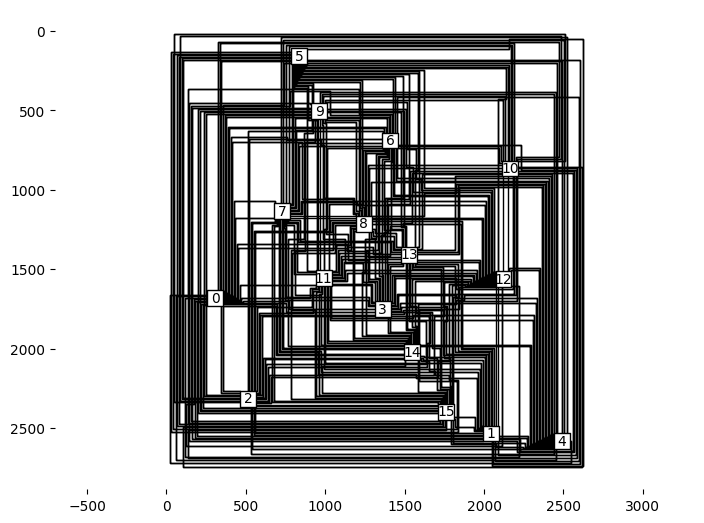

In [5]:

GA = ogdf.GraphAttributes(G, ogdf.GraphAttributes.all)
# define graph attributes
GA.directed=False

for n in G.nodes:
    GA.label[n] = "%s" % n.index()
    GA.width[n] = Tile_length
    GA.height[n] = Tile_length

for e in G.edges:
    GA.arrowType[e] =0

# SL = ogdf.PlanarizationLayout()
# SL.call(GA)
# GA

# Initialize layout components
pl = ogdf.PlanarizationLayout()
crossMin = ogdf.SubgraphPlanarizer()
ps = ogdf.PlanarSubgraphFast[int]()
ps.runs(100)
ves = ogdf.VariableEmbeddingInserter()
ves.removeReinsert(ogdf.RemoveReinsertType.All)

# Set up PlanarizationLayout components
crossMin.setSubgraph(ps)
crossMin.setInserter(ves)
pl.setCrossMin(crossMin)

# emb = ogdf.EmbedderMinDepthMaxFaceLayers()
# pl.setEmbedder(emb)

ol = ogdf.OrthoLayout()
ol.separation(10.0)
ol.cOverhang(10.0)

pl.setPlanarLayouter(ol)

pl.call(GA)
GA

In [6]:
pl.numberOfCrossings()

2360

In [4]:
def calculate_edge_length(edge):
    length = 0
    points = edge['graphics']['Line']
    for i in range(len(points) - 1):
        x1, y1 = points[i]['x'], points[i]['y']
        x2, y2 = points[i + 1]['x'], points[i + 1]['y']
        length += abs(x2 - x1) + abs(y2 - y1)
    return length


def read_x_y(line):
    # e.g., line = '\t\t\t\tpoint [ x 230.0000000000 y 540.0000000000 ]\n'
    # Extract x and y values without using re
    start_index = line.find('x') + 1
    end_index = line.find('y')
    x_str = line[start_index:end_index].strip()
    y_str = line[end_index + 1 : -3].strip()  # -3 to exclude the closing bracket and newline
    # Convert to float
    x = float(x_str)
    y = float(y_str)
    return(x, y)

ogdf.GraphIO.write(GA, "temp.gml")
with open('temp.gml', 'r') as file:
    lines = file.readlines()

edges = []
current_edge = None

for line in lines:
    if 'edge' in line:
        current_edge = {'graphics': {'Line': []}}
    elif 'source' in line and current_edge is not None:
        current_edge['source'] = int(line.split()[1])
    elif 'target' in line and current_edge is not None:
        current_edge['target'] = int(line.split()[1])
    elif (']' in line) and (current_edge is not None) and (not ('point' in line)):
        edges.append(current_edge)
        current_edge = None
    elif 'point' in line and current_edge is not None:
        # Extract coordinates of points in the line segment
        coordinates = read_x_y(line)
        point = {'x': coordinates[0], 'y': coordinates[1]}
        current_edge['graphics']['Line'].append( point)

edge_lengths=[]
for edge in edges:
    length = calculate_edge_length(edge)
    edge_lengths.append(length)
    print(f"Edge from {edge['source']} to {edge['target']} has length: {length}")


Edge from 0 to 1 has length: 945.8333333333001
Edge from 0 to 2 has length: 1608.3333333331998
Edge from 0 to 3 has length: 4281.2499999998
Edge from 0 to 4 has length: 1064.5833333333999
Edge from 0 to 5 has length: 647.9166666666999
Edge from 0 to 6 has length: 522.9166666666999
Edge from 0 to 7 has length: 1085.4166666666001
Edge from 0 to 8 has length: 831.2499999999999
Edge from 0 to 9 has length: 235.41666666679998
Edge from 0 to 10 has length: 1210.4166666666001
Edge from 0 to 11 has length: 870.8333333333001
Edge from 0 to 12 has length: 695.8333333334001
Edge from 0 to 13 has length: 2266.6666666669
Edge from 0 to 14 has length: 902.0833333333001
Edge from 0 to 15 has length: 439.58333333330006
Edge from 1 to 2 has length: 535.4166666666001
Edge from 1 to 3 has length: 999.9999999999002
Edge from 1 to 4 has length: 354.1666666667
Edge from 1 to 5 has length: 270.83333333340005
Edge from 1 to 6 has length: 1243.7500000001
Edge from 1 to 7 has length: 1520.8333333332996
Edge fro

In [5]:
Tile_real_length = 30 #[mm]
ratio=Tile_real_length/Tile_length
for i in range(len(edge_lengths)):
    edge_lengths[i]*=ratio

In [6]:
edge_lengths

[283.74999999999,
 482.4999999999599,
 1284.37499999994,
 319.37500000001995,
 194.37500000000998,
 156.87500000000998,
 325.62499999998005,
 249.37499999999994,
 70.62500000003999,
 363.12499999998005,
 261.24999999999,
 208.75000000002004,
 680.0000000000699,
 270.62499999999,
 131.87499999999002,
 160.62499999998002,
 299.99999999997004,
 106.25000000000999,
 81.25000000002001,
 373.12500000003,
 456.2499999999899,
 275.62500000003,
 169.37500000001998,
 173.74999999998002,
 673.7499999999901,
 16.874999999999982,
 281.24999999999994,
 204.37500000000003,
 101.87500000002001,
 117.49999999998003,
 122.49999999999,
 258.12500000001,
 891.2500000000201,
 371.87499999999005,
 865.62499999998,
 436.87499999997,
 150.0,
 978.74999999997,
 224.37499999998,
 244.99999999998,
 247.5,
 325.62500000000995,
 251.25,
 437.49999999998994,
 411.87500000000995,
 318.12499999997993,
 371.87499999999,
 1022.5000000000199,
 271.24999999997993,
 514.37499999999,
 364.37499999998994,
 246.25000000002,


In [7]:
from statistics import mean
mean(edge_lengths)

288.6979166666635

In [8]:
max(edge_lengths)

1284.37499999994